### Basic Ray Tutorial and Deep Q Learning

In the first part of the tutorial we showcase what ray can do to speed up code and functions.  We will show how a simple decorator function enables a standard written python function to be run in a parallelized manner and distributed across nodes.

The second part of this tutorial focuses on the cart-pole problem. A cart has a pole fixed with a movable lever in the middle of the cart. The cart slides along a frictionless surface. The goal is to keep the pole upright at all times. The test is how far back and forth the cart can move in order to prevent the pole from falling. The tutorial has been modified heavily so that it (i) runs in a jupyter notebook, (ii) demonstrates full capabilities of ray, and ray tune and (iii) breaks down the components of a RL project along with enhanced explainations of the code. We may modify this tutorial further to solve a different problem.

In the third part of the tutorial, we demonstrate how to create a custom reinforcement learning environment with the problem space of a robot walking down a corridor.

#### References:

Barto, A. G., Sutton, R. S. and Anderson, C. (1983), ‘Neuron-like adaptive elements that can solve difficult learning control problems’, IEEE Transactions on Systems, 5, Man, and Cybernetics 13, 834–846

Tune: A Research Platform for Distributed Model Selection and Training, Liaw, Richard and Liang, Eric and Nishihara, Robert and Moritz, Philipp and Gonzalez, Joseph E and Stoica, Ion, arXiv preprint arXiv:1807.05118}, 2018

Ray RLLib Documentation: [Ray RLLib Documentation](https://docs.ray.io/en/latest/rllib-training.html#getting-started)

Ray Tune Documentation: [Ray Tune Documentation](https://docs.ray.io/en/latest/tune/index.html)

Mastering Reinforcement Learning with Python, Enes Bilgin, Packt Publishing, 2020 [Buy MRL with Python](https://www.amazon.com/Mastering-Reinforcement-Learning-Python-next-generation/dp/1838644148/?tag=meastus-200)

#### Checking Ray Version, Instantiating Ray Instances and Looking at Node Parameters

Its typically helpful to check the parameters for nodes to ensure that they are in good shape.  One can also navigate to the tab which says 'Ray Web UI) to look through the node pool and ray actors as well as memory.  These are advanced topics and are meant for trouble-shooting only. 


In this notebook we'll start with showing you how easy it is to use Ray to convert regular functions into ones that are parallelized and distributed across nodes.  Before we do anything though, let's check our version of Ray.  

In [1]:
! ray --version

ray, version 1.9.0


In [2]:
import ray
import os

if ray.is_initialized() == False:
   service_host = os.environ["RAY_HEAD_SERVICE_HOST"]
   service_port = os.environ["RAY_HEAD_SERVICE_PORT"]
   #_temp_dir='/domino/datasets/local/{}/'.format(os.environ['DOMINO_PROJECT_NAME']) #set to a dataset
   ray.util.connect(f"{service_host}:{service_port}")

Now let's check the health of the nodes, look at their CPU and GPU per node.  Here you can see each node, including the head node have seven GPUs (this may differ in your example depending on your environment).  It's a good idea to check this and plan for memory usuage with Ray.  If there isn't enough memory overhead for the code as written, a data channel error will shutdown.  There are advanced techniques to prevent this.  This happens regardless of the verison of Ray used, so make sure to check each time.

In [3]:
ray.nodes()

[{'NodeID': '3e29ea829a1a9c7cc62058de0cdfdc10e5e4a03ee540964e29b4be92',
  'Alive': True,
  'NodeManagerAddress': '10.0.37.253',
  'NodeManagerHostname': 'ray-61bf4c91992e0d71a81ef1b3-ray-worker-1',
  'NodeManagerPort': 2385,
  'ObjectManagerPort': 2384,
  'ObjectStoreSocketName': '/tmp/ray/session_2021-12-19_15-25-31_965372_1/sockets/plasma_store',
  'RayletSocketName': '/tmp/ray/session_2021-12-19_15-25-31_965372_1/sockets/raylet',
  'MetricsExportPort': 55975,
  'alive': True,
  'Resources': {'memory': 41296069428.0,
   'CPU': 7.0,
   'GPU': 1.0,
   'object_store_memory': 17698315468.0,
   'node:10.0.37.253': 1.0,
   'accelerator_type:V100': 1.0}},
 {'NodeID': '8671482a0e1a13d793effbe70ee2709b8d3c5793e1bcf4b89b1554d7',
  'Alive': True,
  'NodeManagerAddress': '10.0.60.5',
  'NodeManagerHostname': 'ray-61bf4c91992e0d71a81ef1b3-ray-worker-0',
  'NodeManagerPort': 2385,
  'ObjectManagerPort': 2384,
  'ObjectStoreSocketName': '/tmp/ray/session_2021-12-19_15-25-31_965372_1/sockets/plasma_

### What is Ray and what can it do?



Ray is a flexible distributed computing system available on Domino product on demand.  With Ray one can run code both in parallel or in distributed mode.  Parallel mode refers to running a function on several threads simultaneously in parallel.  This method can also be accomplished on multiple nodes at once (distributed computing).  One will notice that the wall clock time (which we compute below) differs from the compute time.  With multiple nodes or threading (running in a distributed fashion), the compute time is split among nodes.  Thus when we provide a 10 second 'sleep' we can see that the 10 seconds is distributed and so the wall clock time (the time we actually experience) is shorter than compute time.  This is part of the magic of parallel and distributed computing.  Let's take a closer look below.

In [3]:
import time
import os
import ray


y = 1
object_ref = y

def add(x, a=1):
    if x == 'add':
        answer = a + 1
    else:
        answer = a
    time.sleep(5)
    print(answer)
    
number_add =add('add')
number_none =add('hello')
        
object_ids = []
st = time.time()
for x in range(2):
    x = x
    y_id = add('add')
    object_ids.append(y_id) # the object ids will print out
    
## getting the results to pass to another function
objects = object_ids
end = time.time()
print("Time taken: ", str(end-st))

2
1
2
2
Time taken:  10.008283853530884


## Creating remote objects

Put an object in Ray's object store, get it out and run the function
say want to add 10 million and after every million 5 seconds, total processing would be 50 seconds

Do this in ray, and have 3 ray workers, adding 1 million values each, 
after calculating 1 million each sleeps 5 seconds, then total processing takes less than six seconds
iterations in learning 
ml is already iterative, running partitions on each worker and at the distributed sequentially now paralellized
call without ray and then with ray
small amount of data, run and then kick off with same code but a larger data set, locally and in cloud testuse 10 workers, each sleeps 2 seconds, and see the difference

In [4]:
import ray
import time

y = 1
object_ref = ray.put(y)

@ray.remote
def add(x, a=1):
    if x == 'add':
        answer = a + 1
    else:
        answer = a
    time.sleep(5)
    print(answer)
    
number_add = ray.get(add.remote('add'))
number_none = ray.get(add.remote('hello'))
        
object_ids = []
st = time.time()
for x in range(2):
    x = x
    y_id = add.remote('add')
    object_ids.append(y_id) # the object ids will print out
    
## getting the results to pass to another function
objects = ray.get(object_ids)
end = time.time()
print(str(end-st))

#notice that the process ids (pid) have the same number (223) except for the head node which has the number 221

(add pid=220) 2
(add pid=220) 1
5.057931423187256
(add pid=220) 2
(add pid=218) 2


### Calculate Pi

In [63]:
# Approximations of Pi, using n>50

def pi(n):
    if n >= 50:
        k = 1
        # Initialize sum
        s = 0
        for i in range(n):
            # even index elements are positive
            if i % 2 == 0:
                s += 4/k
            else:
                # odd index elements are negative
                s -= 4/k
            # if denominator is odd
            k += 2
        time.sleep(10)    
        print(s)
    else:
        print('Try a number greater than or equal to 50')

In [64]:
%%time
pi(1000000)

3.1415916535897743
CPU times: user 185 ms, sys: 0 ns, total: 185 ms
Wall time: 10.2 s


In [66]:
@ray.remote
def pi(n):
    if n >= 50:
        k = 1
        # Initialize sum
        s = 0
        for i in range(n):
            # even index elements are positive
            if i % 2 == 0:
                s += 4/k
            else:
                # odd index elements are negative
                s -= 4/k
            # if denominator is odd
            k += 2
        time.sleep(10)
        print(s)
    else:
        print('Try a number greater than or equal to 50')

In [67]:
%%time

pi = pi.remote(1000000)

CPU times: user 3.7 ms, sys: 0 ns, total: 3.7 ms
Wall time: 3.24 ms
(pi pid=220) 3.1415916535897743


Notice in the above examples the compute time differs and the wall clock time for the compute differs. However keep in mind Ray is only using one worker to calculate pi in this simple example. 

A few more examples below show how to appropriately use Ray to speed up calculations.

In [10]:
def return_multiple():
    time.sleep(5)
    return 1, 2, 3

st = time.time()
a, b, c = return_multiple()
end = time.time()
print(a,b,c)
print('The wall-clock time is ', str(end-st))

(pi pid=220) 3.1415916535897743
1 2 3
The wall-clock time is  5.005219459533691


In [11]:
@ray.remote(num_returns=3)
def return_multiple():
    time.sleep(5)
    return 1, 2, 3


st = time.time()
a, b, c = return_multiple.remote()
end = time.time()
print(ray.get(a), ray.get(b), ray.get(c))
print('The wall-clock time is ', str(end-st))

1 2 3
The wall-clock time is  0.004021167755126953


In [12]:
ray.shutdown()

### The Cart Pole Problem

Training with hyperparameter tuning was traditionally very human-time intensive. With the Ray 'tune' tool, hyper-parameter tuning is automated.  Ray is not the only software that can do this neat trick of parallel and distributed compute.  It can be done with any distributed system.  Ray just happens to particularlly excell at deeep learning and reinforcement learning.  

RLlib is an open-source library for reinforcement learning that offers both high scalability and a unified API for a variety of applications. RLlib natively supports TensorFlow, TensorFlow Eager, and PyTorch, but most of its internals are framework agnostic. See the docs [here](https://docs.ray.io/en/latest/rllib.html) for more information. 

### Running the Cart-Pole Problem

#### Determining the best learning rate using Ray's Tune library

The example below shows how to use Ray's Tune library with the cart-pole problem.  The best learning rate can be determined by the reward amount.  Its a best practise to shutdown and re start your distributed computing system each time.  This allows the workers to clear their memory.  In addition the example below is one where we run the cart-pole problem in a distributed manner.  We'll show a second example where we run the experiment in a parallel manner.  In this distributed example you'll see that it takes less than 20 seconds to run the entire training loop.


In [13]:
import ray
import os

ray.shutdown()

if ray.is_initialized() == False:
   service_host = os.environ["RAY_HEAD_SERVICE_HOST"]
   service_port = os.environ["RAY_HEAD_SERVICE_PORT"]
   _temp_dir='/domino/datasets/local/{}/'.format(os.environ['DOMINO_PROJECT_NAME']) #set to a dataset
   ray.util.connect(f"{service_host}:{service_port}")

In [14]:
import ray
from ray import tune
from ray.tune.logger import pretty_print


analysis = tune.run(
    "DQN",
    stop={"episode_reward_mean": 1},
    config={
        "env": "CartPole-v0",
        "num_gpus": 0,
        "num_workers": 1,
        "lr": tune.grid_search([0.01, 0.001, 0.0001]),
    },
)

#print("Best configuration: ", analysis.best_config)
ray.shutdown()

(run pid=370) == Status ==
(run pid=370) Current time: 2021-12-19 15:29:10 (running for 00:00:00.13)
(run pid=370) Memory usage on this node: 3.4/60.0 GiB
(run pid=370) Using FIFO scheduling algorithm.
(run pid=370) Resources requested: 0/35 CPUs, 0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=370) Result logdir: /home/ubuntu/ray_results/DQN
(run pid=370) Number of trials: 3/3 (3 PENDING)
(run pid=370) +-----------------------------+----------+-------+--------+
(run pid=370) | Trial name                  | status   | loc   |     lr |
(run pid=370) |-----------------------------+----------+-------+--------|
(run pid=370) | DQN_CartPole-v0_672ee_00000 | PENDING  |       | 0.01   |
(run pid=370) | DQN_CartPole-v0_672ee_00001 | PENDING  |       | 0.001  |
(run pid=370) | DQN_CartPole-v0_672ee_00002 | PENDING  |       | 0.0001 |
(run pid=370) +-----------------------------+----------+-------+--------+
(run pid=370) 
(run pid=370) 


(DQN pid=367) 2021-12-19 15:29:13,712	INFO trainer.py:722 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also want to then set `eager_tracing=True` in order to reach similar execution speed as with static-graph mode.
(DQN pid=367) 2021-12-19 15:29:13,712	INFO dqn.py:141 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(DQN pid=367) 2021-12-19 15:29:13,712	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(DQN pid=77, ip=10.0.49.194) 2021-12-19 15:29:15,042	INFO trainer.py:722 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also want to then set `eager_tracing=True` in order to reach similar execution speed 

(run pid=370) == Status ==
(run pid=370) Current time: 2021-12-19 15:29:22 (running for 00:00:12.05)
(run pid=370) Memory usage on this node: 4.1/60.0 GiB
(run pid=370) Using FIFO scheduling algorithm.
(run pid=370) Resources requested: 6.0/35 CPUs, 0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=370) Result logdir: /home/ubuntu/ray_results/DQN
(run pid=370) Number of trials: 3/3 (3 RUNNING)
(run pid=370) +-----------------------------+----------+-----------------+--------+
(run pid=370) | Trial name                  | status   | loc             |     lr |
(run pid=370) |-----------------------------+----------+-----------------+--------|
(run pid=370) | DQN_CartPole-v0_672ee_00000 | RUNNING  | 10.0.51.106:367 | 0.01   |
(run pid=370) | DQN_CartPole-v0_672ee_00001 | RUNNING  | 10.0.49.194:77  | 0.001  |
(run pid=370) | DQN_CartPole-v0_672ee_00002 | RUNNING  | 10.0.41.148:77  | 0.0001 |
(run pid=370) +-----------------------------+----------

(run pid=370) Result for DQN_CartPole-v0_672ee_00002:
(run pid=370)   agent_timesteps_total: 1000
(run pid=370)   custom_metrics: {}
(run pid=370)   date: 2021-12-19_15-29-24
(run pid=370)   done: true
(run pid=370)   episode_len_mean: 21.0
(run pid=370)   episode_media: {}
(run pid=370)   episode_reward_max: 48.0
(run pid=370)   episode_reward_mean: 21.0
(run pid=370)   episode_reward_min: 11.0
(run pid=370)   episodes_this_iter: 47
(run pid=370)   episodes_total: 47
(run pid=370)   experiment_id: 8962603620584e2bae3e2b69b36e3bad
(run pid=370)   hostname: ray-61bf4c91992e0d71a81ef1b3-ray-worker-3
(run pid=370)   info:
(run pid=370)     last_target_update_ts: 1000
(run pid=370)     learner:
(run pid=370)       default_policy:
(run pid=370)         custom_metrics: {}
(run pid=370)         learner_stats:
(run pid=370)           cur_lr: 9.999999747378752e-05
(run pid=370)           max_q: 0.7482873201370239
(run pid=370)           mean_q: -0.010050836950540543
(run pid=370)           mean

(run pid=370) 2021-12-19 15:29:25,057	INFO tune.py:626 -- Total run time: 18.90 seconds (14.55 seconds for the tuning loop).


#### Looping through multiple iterations to find the best policy

In this example we see that a single node can perform the training.  It takes less than a minute to finish the training loop.  After the data is collected from the training iterations (10), we can look at the results to determine the maximum, mean and minimum reward.  We graph that.  For this notebook you can choose which log files you would like to see using the input.  See what your results look like!



In [32]:
ray.shutdown()
ray.init()

2021-12-19 15:59:20,278	INFO services.py:1338 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '10.0.47.10',
 'raylet_ip_address': '10.0.47.10',
 'redis_address': '10.0.47.10:6379',
 'object_store_address': '/tmp/ray/session_2021-12-19_15-59-17_714742_239/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-12-19_15-59-17_714742_239/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-12-19_15-59-17_714742_239',
 'metrics_export_port': 42266,
 'node_id': '1db3b3625f6624d581aeef8352feaef958bf06c4a2f1e4f9ba010ea6'}

In [33]:
import ray
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print

config = dqn.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 1
trainer = dqn.DQNTrainer(config=config, env="CartPole-v0")

# Can optionally call trainer.restore(path) to load a checkpoint.

for i in range(10):
   # Perform one iteration of training the policy with PPO
   result = trainer.train()
   print(pretty_print(result))

   if i % 100 == 0:
       checkpoint = trainer.save()
       print("checkpoint saved at", checkpoint)

(RolloutWorker pid=8404) 2021-12-19 15:59:26,755	WARNING deprecation.py:45 -- DeprecationWarning: `SampleBatch['is_training']` has been deprecated. Use `SampleBatch.is_training` instead. This will raise an error in the future!


agent_timesteps_total: 1000
custom_metrics: {}
date: 2021-12-19_15-59-32
done: false
episode_len_mean: 22.674418604651162
episode_media: {}
episode_reward_max: 78.0
episode_reward_mean: 22.674418604651162
episode_reward_min: 9.0
episodes_this_iter: 43
episodes_total: 43
experiment_id: e4b7e5fff46b45788ed74b177b87c05c
hostname: run-61bf4c91992e0d71a81ef1b3-46bg7
info:
  last_target_update_ts: 1000
  learner:
    default_policy:
      custom_metrics: {}
      learner_stats:
        cur_lr: 0.0005000000237487257
        max_q: 0.6478759050369263
        mean_q: -0.057972364127635956
        mean_td_error: -0.9809002876281738
        min_q: -0.6995514631271362
        model: {}
      td_error:
      - -0.8978910446166992
      - -0.8127206563949585
      - -1.467315912246704
      - -1.2674442529678345
      - -0.9970976710319519
      - -0.4226508140563965
      - -1.0998400449752808
      - -1.042556643486023
      - -0.1850542426109314
      - -0.7924472093582153
      - -0.812720656394

agent_timesteps_total: 5000
custom_metrics: {}
date: 2021-12-19_15-59-56
done: false
episode_len_mean: 32.61
episode_media: {}
episode_reward_max: 139.0
episode_reward_mean: 32.61
episode_reward_min: 8.0
episodes_this_iter: 11
episodes_total: 176
experiment_id: e4b7e5fff46b45788ed74b177b87c05c
hostname: run-61bf4c91992e0d71a81ef1b3-46bg7
info:
  last_target_update_ts: 4528
  learner:
    default_policy:
      custom_metrics: {}
      learner_stats:
        cur_lr: 0.0005000000237487257
        max_q: 9.091682434082031
        mean_q: 6.57192325592041
        mean_td_error: 0.20031186938285828
        min_q: 0.7229157090187073
        model: {}
      td_error:
      - -0.07173919677734375
      - -0.2770842909812927
      - 4.919246673583984
      - -1.2958145141601562
      - 0.004993915557861328
      - 0.06239604949951172
      - 2.4069600105285645
      - 0.10159873962402344
      - -0.20542395114898682
      - 2.918102264404297
      - -0.3779282569885254
      - 0.5631256103515625

agent_timesteps_total: 9000
custom_metrics: {}
date: 2021-12-19_16-00-21
done: false
episode_len_mean: 63.62
episode_media: {}
episode_reward_max: 200.0
episode_reward_mean: 63.62
episode_reward_min: 8.0
episodes_this_iter: 8
episodes_total: 215
experiment_id: e4b7e5fff46b45788ed74b177b87c05c
hostname: run-61bf4c91992e0d71a81ef1b3-46bg7
info:
  last_target_update_ts: 8560
  learner:
    default_policy:
      custom_metrics: {}
      learner_stats:
        cur_lr: 0.0005000000237487257
        max_q: 15.408904075622559
        mean_q: 12.299129486083984
        mean_td_error: 0.4111831784248352
        min_q: -0.7559371590614319
        model: {}
      td_error:
      - 1.2872157096862793
      - -0.0954294204711914
      - -1.755937099456787
      - 0.33522891998291016
      - 4.729964256286621
      - 0.3840465545654297
      - 0.29047584533691406
      - 0.5781755447387695
      - 0.18021392822265625
      - -0.3184385299682617
      - 0.284210205078125
      - 4.8803391456604
      

#### Looking at the Results

Let's take a look at the results of our training.  Which 

In [18]:
#print path to logs

!ls ~/ray_results/

DQN_CartPole-v0_2021-12-19_15-29-396lylsdgf


In [19]:
logs_path = input('Choose the log file>')

Choose the log file>DQN_CartPole-v0_2021-12-19_15-29-396lylsdgf


In [20]:
import pandas as pd

# choose the path to your output logs
logs_path = logs_path
data_path = '~/ray_results/{}/progress.csv'.format(logs_path)
graph_file = 'progress.csv'

df = pd.read_csv(data_path)
df.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,timesteps_this_iter,agent_timesteps_total,done,...,perf/cpu_util_percent,perf/ram_util_percent,perf/gpu_util_percent0,perf/vram_util_percent0,info/learner/default_policy/td_error,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/mean_q,info/learner/default_policy/learner_stats/min_q,info/learner/default_policy/learner_stats/max_q,info/learner/default_policy/learner_stats/mean_td_error
0,57.0,10.0,23.809524,23.809524,42,1,1000,0,1000,False,...,13.9500,7.3000,0.0,0.018998,[-1.3272281 -1.6428953 -1.1148595 -1.059449...,0.0005,-0.232039,-0.884704,0.021835,-1.241704
1,57.0,9.0,22.885057,22.885057,45,1,2000,0,2000,False,...,24.0750,7.4625,0.0,0.018998,[ 0.44298553 0.7839279 -0.47713804 0.265240...,0.0005,2.229970,1.442986,3.066627,-0.002296
2,66.0,9.0,24.040000,24.040000,38,1,3000,0,3000,False,...,24.8000,7.5000,0.0,0.018998,[-0.2948475 -0.01530695 1.0656462 0.194376...,0.0005,3.782262,0.931887,5.440300,0.032147
3,97.0,9.0,27.870000,27.870000,25,1,4000,0,4000,False,...,25.4250,7.5000,0.0,0.018998,[ 1.9637122 0.02317286 -0.49960113 -0.232507...,0.0005,5.371221,2.229071,6.948530,0.360913
4,160.0,9.0,34.280000,34.280000,12,1,5000,0,5000,False,...,24.3375,7.5000,0.0,0.018998,[ 0.02216434 6.6001015 0.1020174 -0.870739...,0.0005,7.366294,2.446815,8.898622,0.228439


<AxesSubplot:>

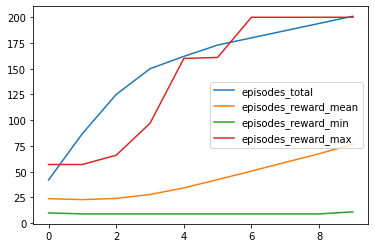

In [21]:
## create dataframe with pertinent information and graph the episode reward mean against the episode  per iteration

episodes_this_iter = df['episodes_this_iter']
episodes_total = df['episodes_total']
episodes_reward_mean = df['episode_reward_mean']
episodes_reward_max = df['episode_reward_max']
episodes_reward_min = df['episode_reward_min']

df_episodes = pd.DataFrame(episodes_total)
df_episodes['episodes_reward_mean'] = df['episode_reward_mean']
df_episodes["episodes_reward_min"] = df['episode_reward_min']
df_episodes["episodes_reward_max"] = df['episode_reward_max']

df_episodes.plot.line()

## here we see the total number of episodes has increased overall but in each iteration, fewer episodes are required 
## to achieve a higher reward.  We see the algorithm learning more quickly towards the end when it reaches its maximum
## iterations and thus its best rewards.

In [22]:
import pprint as pp

policy = trainer.get_policy()
model = policy.model
pp.pprint(model.model_config)

{'_disable_preprocessor_api': False,
 '_time_major': False,
 '_use_default_native_models': False,
 'attention_dim': 64,
 'attention_head_dim': 32,
 'attention_init_gru_gate_bias': 2.0,
 'attention_memory_inference': 50,
 'attention_memory_training': 50,
 'attention_num_heads': 1,
 'attention_num_transformer_units': 1,
 'attention_position_wise_mlp_dim': 32,
 'attention_use_n_prev_actions': 0,
 'attention_use_n_prev_rewards': 0,
 'conv_activation': 'relu',
 'conv_filters': None,
 'custom_action_dist': None,
 'custom_model': None,
 'custom_model_config': {},
 'custom_preprocessor': None,
 'dim': 84,
 'fcnet_activation': 'tanh',
 'fcnet_hiddens': [256, 256],
 'framestack': True,
 'free_log_std': False,
 'grayscale': False,
 'lstm_cell_size': 256,
 'lstm_use_prev_action': False,
 'lstm_use_prev_action_reward': -1,
 'lstm_use_prev_reward': False,
 'max_seq_len': 20,
 'no_final_linear': True,
 'post_fcnet_activation': 'relu',
 'post_fcnet_hiddens': [],
 'use_attention': False,
 'use_lstm': F

In [23]:
ray.shutdown()

### Creating a Custom Environment and Optimized Hyperparameters

In [24]:
if ray.is_initialized() == False:
   service_host = os.environ["RAY_HEAD_SERVICE_HOST"]
   service_port = os.environ["RAY_HEAD_SERVICE_PORT"]
   _temp_dir='/domino/datasets/local/{}/'.format(os.environ['DOMINO_PROJECT_NAME']) #set to a dataset
   ray.util.connect(f"{service_host}:{service_port}")

In [25]:
### Creating a custom environment; adapted from Ray documentation

"""Example of a custom gym environment and model. Run this for a demo.

This example shows:
  - using a custom environment
  - using a custom model
  - using Tune for grid search

You can visualize experiment results in ~/ray_results using TensorBoard.
"""
#ray.shutdown()
#ray.init()

import argparse
import gym
from gym.spaces import Discrete, Box
import numpy as np
import os
import random

import ray
from ray import tune
from ray.tune import grid_search
from ray.rllib.env.env_context import EnvContext
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.models.tf.fcnet import FullyConnectedNetwork
from ray.rllib.models.torch.torch_modelv2 import TorchModelV2
from ray.rllib.models.torch.fcnet import FullyConnectedNetwork as TorchFC
from ray.rllib.utils.framework import try_import_tf, try_import_torch
from ray.rllib.utils.test_utils import check_learning_achieved

torch, nn = try_import_torch()
run = 'DQN'
framework = 'torch'
as_test="store_true"
stop_iters = 50
stop_timesteps = 100000
stop_reward = 0.1

class SimpleCorridor(gym.Env):
    """Example of a custom env in which you have to walk down a corridor.

    You can configure the length of the corridor via the env config."""

    def __init__(self, config: EnvContext):
        self.end_pos = config["corridor_length"]
        self.cur_pos = 0
        self.action_space = Discrete(2)
        self.observation_space = Box(
            0.0, self.end_pos, shape=(1, ), dtype=np.float32)
        # Set the seed. This is only used for the final (reach goal) reward.
        self.seed(config.worker_index * config.num_workers)

    def reset(self):
        self.cur_pos = 0
        return [self.cur_pos]

    def step(self, action):
        assert action in [0, 1], action
        if action == 0 and self.cur_pos > 0:
            self.cur_pos -= 1
        elif action == 1:
            self.cur_pos += 1
        done = self.cur_pos >= self.end_pos
        # Produce a random reward when we reach the goal.
        return [self.cur_pos], \
            random.random() * 2 if done else -0.1, done, {}

    def seed(self, seed=None):
        random.seed(seed)

class TorchCustomModel(TorchModelV2, nn.Module):
    """Example of a PyTorch custom model that just delegates to a fc-net."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name):
        TorchModelV2.__init__(self, obs_space, action_space, num_outputs,
                              model_config, name)
        nn.Module.__init__(self)

        self.torch_sub_model = TorchFC(obs_space, action_space, num_outputs,
                                       model_config, name)

    def forward(self, input_dict, state, seq_lens):
        input_dict["obs"] = input_dict["obs"].float()
        fc_out, _ = self.torch_sub_model(input_dict, state, seq_lens)
        return fc_out, []

    def value_function(self):
        return torch.reshape(self.torch_sub_model.value_function(), [-1])




In [28]:
## run and create the environment; change to work in a notebook

import ray
from ray.tune import grid_search
import argparse
import gym
from gym.spaces import Discrete, Box
import numpy as np
import os
import random
import pprint as pp

import ray
from ray import tune
from ray.tune import grid_search
from ray.rllib.env.env_context import EnvContext
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.models.tf.fcnet import FullyConnectedNetwork
from ray.rllib.models.torch.torch_modelv2 import TorchModelV2
from ray.rllib.models.torch.fcnet import FullyConnectedNetwork as TorchFC
from ray.rllib.utils.framework import try_import_tf, try_import_torch
from ray.rllib.utils.test_utils import check_learning_achieved
from ray.rllib.utils.numpy import convert_to_numpy

local_dir = '/domino/datasets/local/{}'.format(os.environ['DOMINO_PROJECT_NAME'])

# Can also register the env creator function explicitly with:
#. register_env("corridor", lambda config: SimpleCorridor(config))

ModelCatalog.register_custom_model(
    "my_model", TorchCustomModel
    if framework == "torch" else CustomModel)

config = {
    "env": SimpleCorridor,  # or "corridor" if registered above
    "env_config": {
        "corridor_length": 5,
    },
    # Ray will automatically detect the number of gpus if set to 0
    # Can be set manually if change '0' to and integer number below
    # The number will be Workers/GPUs requested - 1
    "num_gpus": 1,
    "model": {
        "custom_model": "my_model",
        "vf_share_layers": True,
    },
    "lr": grid_search([1e-2, 1e-4, 1e-6]),  # try different lrs
    "num_workers": 0,  # parallelism
    "framework": framework,
    'simple_optimizer': False
}

stop = {
    "training_iteration": stop_iters,
    "timesteps_total": stop_timesteps,
    "episode_reward_mean": stop_reward,
}

results = tune.run(run, config=config, stop=stop, local_dir = local_dir)

if as_test:
    check_learning_achieved(results, stop_reward)
    
print("best config: ", results.get_best_config(metric = 'episode_reward_mean', mode = 'max'))

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:36:10 (running for 00:00:00.17)
(run pid=887) Memory usage on this node: 3.6/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 0/35 CPUs, 0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (3 PENDING)
(run pid=887) +--------------------------------+----------+-------+--------+
(run pid=887) | Trial name                     | status   | loc   |     lr |
(run pid=887) |--------------------------------+----------+-------+--------|
(run pid=887) | DQN_SimpleCorridor_63f1b_00000 | PENDING  |       | 0.01   |
(run pid=887) | DQN_SimpleCorridor_63f1b_00001 | PENDING  |       | 0.0001 |
(run pid=887) | DQN_SimpleCorridor_63f1b_00002 | PENDING  |       | 1e-06  |
(run pid=887) +--------------------------------+----------+-------+--------+
(run pid

(DQN pid=149, ip=10.0.60.5) 2021-12-19 15:36:14,937	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
(DQN pid=149, ip=10.0.60.5) 2021-12-19 15:36:14,937	INFO dqn.py:141 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(DQN pid=149, ip=10.0.60.5) 2021-12-19 15:36:14,937	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(DQN pid=770, ip=10.0.41.148) 2021-12-19 15:36:15,156	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
(DQN pid=770, ip=10.0.41.148) 2021-12-19 15:36:15,157	INFO dqn.py:141 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't wor

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:36:19 (running for 00:00:09.37)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 3.0/35 CPUs, 3.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (3 RUNNING)
(run pid=887) +--------------------------------+----------+-----------------+--------+
(run pid=887) | Trial name                     | status   | loc             |     lr |
(run pid=887) |--------------------------------+----------+-----------------+--------|
(run pid=887) | DQN_SimpleCorridor_63f1b_00000 | RUNNING  | 10.0.60.5:149   | 0.01   |
(run pid=887) | DQN_SimpleCorridor_63f1b_00001 | RUNNING  | 10.0.41.148:770 | 0.0001 |
(run pid=887) | DQN_SimpleCorridor_63f1b_00002 | RUNNING  | 10.0.37.253:77  | 1e-06  |
(run pid=887) +------

(run pid=887) Result for DQN_SimpleCorridor_63f1b_00002:
(run pid=887)   agent_timesteps_total: 1000
(run pid=887)   custom_metrics: {}
(run pid=887)   date: 2021-12-19_15-36-22
(run pid=887)   done: false
(run pid=887)   episode_len_mean: 23.186046511627907
(run pid=887)   episode_media: {}
(run pid=887)   episode_reward_max: 1.3483537645997843
(run pid=887)   episode_reward_mean: -1.224193862227773
(run pid=887)   episode_reward_min: -6.753835120359632
(run pid=887)   episodes_this_iter: 43
(run pid=887)   episodes_total: 43
(run pid=887)   experiment_id: 7aca033a6d2a4b5eb373ff4c3af579e8
(run pid=887)   hostname: ray-61bf4c91992e0d71a81ef1b3-ray-worker-1
(run pid=887)   info:
(run pid=887)     last_target_update_ts: 1000
(run pid=887)     learner:
(run pid=887)       default_policy:
(run pid=887)         learner_stats:
(run pid=887)           cur_lr: 1.0e-06
(run pid=887)           max_q: 0.0
(run pid=887)           mean_q: -0.5998052358627319
(run pid=887)           min_q: -1.018884

(run pid=887) Result for DQN_SimpleCorridor_63f1b_00001:
(run pid=887)   agent_timesteps_total: 2000
(run pid=887)   custom_metrics: {}
(run pid=887)   date: 2021-12-19_15-36-30
(run pid=887)   done: false
(run pid=887)   episode_len_mean: 28.154929577464788
(run pid=887)   episode_media: {}
(run pid=887)   episode_reward_max: 1.1581613391152907
(run pid=887)   episode_reward_mean: -1.738554768908724
(run pid=887)   episode_reward_min: -7.461486486020717
(run pid=887)   episodes_this_iter: 47
(run pid=887)   episodes_total: 71
(run pid=887)   experiment_id: f3ef094fd1234ee5bedb38f5fd2ace46
(run pid=887)   hostname: ray-61bf4c91992e0d71a81ef1b3-ray-worker-3
(run pid=887)   info:
(run pid=887)     last_target_update_ts: 1504
(run pid=887)     learner:
(run pid=887)       default_policy:
(run pid=887)         learner_stats:
(run pid=887)           cur_lr: 0.0001
(run pid=887)           max_q: 0.6045228242874146
(run pid=887)           mean_q: 0.39665380120277405
(run pid=887)           mi

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:36:32 (running for 00:00:22.02)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 3.0/35 CPUs, 3.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (3 RUNNING)
(run pid=887) +--------------------------------+----------+-----------------+--------+--------+------------------+------+----------+----------------------+----------------------+--------------------+
(run pid=887) | Trial name                     | status   | loc             |     lr |   iter |   total time (s) |   ts |   reward |   episode_reward_max |   episode_reward_min |   episode_len_mean |
(run pid=887) |--------------------------------+----------+-----------------+--------+--------+------------------+------+----------+-----------

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:36:42 (running for 00:00:32.33)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 3.0/35 CPUs, 3.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (3 RUNNING)
(run pid=887) +--------------------------------+----------+-----------------+--------+--------+------------------+------+-----------+----------------------+----------------------+--------------------+
(run pid=887) | Trial name                     | status   | loc             |     lr |   iter |   total time (s) |   ts |    reward |   episode_reward_max |   episode_reward_min |   episode_len_mean |
(run pid=887) |--------------------------------+----------+-----------------+--------+--------+------------------+------+-----------+--------

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:36:47 (running for 00:00:37.75)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 3.0/35 CPUs, 3.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (3 RUNNING)
(run pid=887) +--------------------------------+----------+-----------------+--------+--------+------------------+------+-----------+----------------------+----------------------+--------------------+
(run pid=887) | Trial name                     | status   | loc             |     lr |   iter |   total time (s) |   ts |    reward |   episode_reward_max |   episode_reward_min |   episode_len_mean |
(run pid=887) |--------------------------------+----------+-----------------+--------+--------+------------------+------+-----------+--------

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:36:53 (running for 00:00:43.14)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 1.0/35 CPUs, 1.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (1 RUNNING, 2 TERMINATED)
(run pid=887) +--------------------------------+------------+-----------------+--------+--------+------------------+------+-----------+----------------------+----------------------+--------------------+
(run pid=887) | Trial name                     | status     | loc             |     lr |   iter |   total time (s) |   ts |    reward |   episode_reward_max |   episode_reward_min |   episode_len_mean |
(run pid=887) |--------------------------------+------------+-----------------+--------+--------+------------------+------+

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:37:03 (running for 00:00:53.40)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 1.0/35 CPUs, 1.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (1 RUNNING, 2 TERMINATED)
(run pid=887) +--------------------------------+------------+-----------------+--------+--------+------------------+------+-----------+----------------------+----------------------+--------------------+
(run pid=887) | Trial name                     | status     | loc             |     lr |   iter |   total time (s) |   ts |    reward |   episode_reward_max |   episode_reward_min |   episode_len_mean |
(run pid=887) |--------------------------------+------------+-----------------+--------+--------+------------------+------+

(run pid=887) == Status ==
(run pid=887) Current time: 2021-12-19 15:37:13 (running for 00:01:03.47)
(run pid=887) Memory usage on this node: 3.7/60.0 GiB
(run pid=887) Using FIFO scheduling algorithm.
(run pid=887) Resources requested: 1.0/35 CPUs, 1.0/5 GPUs, 0.0/186.81 GiB heap, 0.0/82.42 GiB objects (0.0/5.0 accelerator_type:V100)
(run pid=887) Result logdir: /domino/datasets/local/Ray_Quick_Start/DQN
(run pid=887) Number of trials: 3/3 (1 RUNNING, 2 TERMINATED)
(run pid=887) +--------------------------------+------------+-----------------+--------+--------+------------------+------+------------+----------------------+----------------------+--------------------+
(run pid=887) | Trial name                     | status     | loc             |     lr |   iter |   total time (s) |   ts |     reward |   episode_reward_max |   episode_reward_min |   episode_len_mean |
(run pid=887) |--------------------------------+------------+-----------------+--------+--------+------------------+-----

ok
best config:  {'env': <class '__main__.SimpleCorridor'>, 'env_config': {'corridor_length': 5}, 'num_gpus': 1, 'model': {'custom_model': 'my_model', 'vf_share_layers': True}, 'lr': 0.01, 'num_workers': 0, 'framework': 'torch', 'simple_optimizer': False}


(run pid=887) 2021-12-19 15:37:14,704	INFO tune.py:626 -- Total run time: 64.47 seconds (63.89 seconds for the tuning loop).


### A Note about Warnings

Version 1.6 is validated on the latest edition of Domino, but you see here we chose to use the latest stable version of Ray, 1.9.  This version will occasionally throw some warning about depreciation for future versions of Ray or Pytorch because it is the newest stable version of Ray.  Don't worry too much about the warnings, they will not change the procedures followed to run the code.


### What's Next?

*Using Pytorch and Ray for a simple finance example using DQN*